# Benchmarking of the Models

As per the paper we have appplied the following benchmarks to compare the models.
- Area Under Curve of ROC plot
- Floating Point Operations Per Second (FLOPS)
- No. of Parameters
- AUC score on applying Perturbation
- Inference Time

## Calculating Predictions

In [1]:
from classifiers import Meso4, XceptionClassifier
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.xception import preprocess_input

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter

from tensorflow.keras.models import load_model

from classifiers import Meso4, XceptionClassifier

import numpy as np
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from tensorflow.keras.applications.xception import preprocess_input


2025-06-30 23:37:44.950446: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-30 23:37:44.987134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751306865.027516  699396 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751306865.039893  699396 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751306865.070996  699396 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
meso = Meso4()
meso.model.load_weights("Custom-Trained-Weights/MesoNet.weights.h5")

xcep = XceptionClassifier()
xcep.model.load_weights("Custom-Trained-Weights/XceptionNet.weights.h5")

I0000 00:00:1751306873.079057  699396 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2153 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/vishesh/anaconda3/envs/tfbase/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/vishesh/anaconda3/envs/tfbase/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 314 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
test_loader_meso= ImageDataGenerator().flow_from_directory(
    directory="test_faces",
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
test_loader_xception= ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory="test_faces",
    target_size=(256, 256),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
# Compute predictions
y_pred_meso = meso.predict(test_loader_meso)
y_pred_xcep = xcep.predict(test_loader_xception)
# Compute ground truth labels
y_true = test_loader_meso.classes
# Convert predictions to class labels
y_pred_meso_classes = (y_pred_meso > 0.5).astype(int).flatten()
y_pred_xcep_classes = (y_pred_xcep > 0.5).astype(int).flatten()


/home/vishesh/anaconda3/envs/tfbase/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


I0000 00:00:1751306878.532902  699520 service.cc:152] XLA service 0x7401ec0035b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751306878.532952  699520 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-06-30 23:37:58.563048: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751306878.723803  699520 cuda_dnn.cc:529] Loaded cuDNN version 90300


 4/63 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step

I0000 00:00:1751306880.926877  699520 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step


## Accuracy and F1-Score

In [5]:
# Compute accuracy        # Preprocess for each model
accuracy_meso = accuracy_score(y_true, y_pred_meso_classes)
accuracy_xcep = accuracy_score(y_true, y_pred_xcep_classes)
print(f"Meso4 Accuracy: {accuracy_meso:.2f}")
print(f"Xception Accuracy: {accuracy_xcep:.2f}")

Meso4 Accuracy: 0.80
Xception Accuracy: 0.82


In [6]:
# Compute F1 score
f1_meso = f1_score(y_true, y_pred_meso_classes, average='weighted')
f1_xcep = f1_score(y_true, y_pred_xcep_classes, average='weighted')
print(f"Meso4 F1 Score: {f1_meso:.2f}")
print(f"Xception F1 Score: {f1_xcep:.2f}")

Meso4 F1 Score: 0.80
Xception F1 Score: 0.81


Inference- As we can see from the accuracy and F1 score xception model performs slightly better than the Mesonet, but the difference is not too much and we can consider them simmilar in performance with respect to accuracy and F1 scores.

## Confusion Matrix

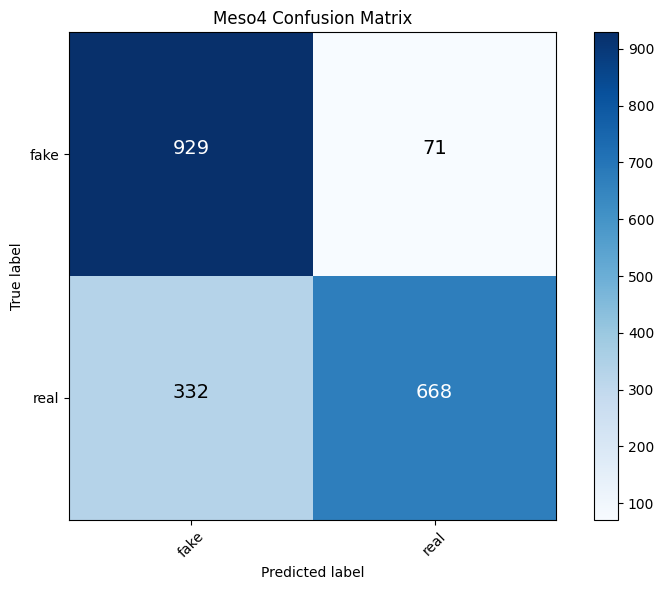

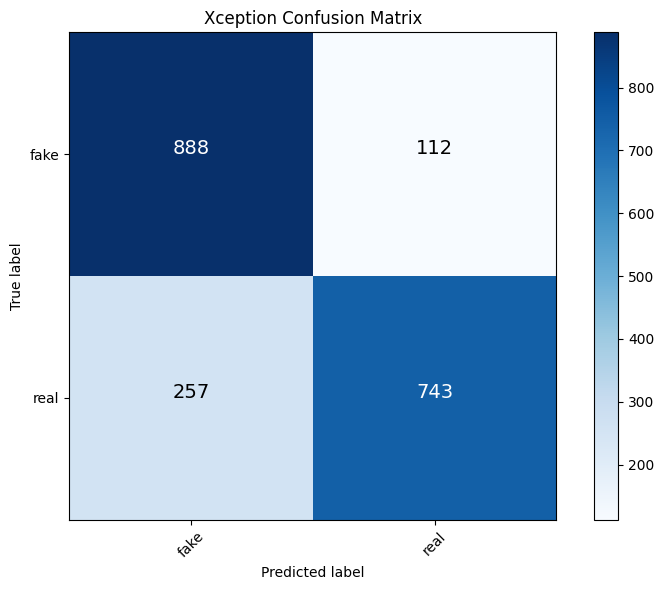

In [7]:
# Compute confusion matrix
cm_meso = confusion_matrix(y_true, y_pred_meso_classes)
cm_xcep = confusion_matrix(y_true, y_pred_xcep_classes)

# Plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    class_names = list(test_loader_meso.class_indices.keys())
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)


    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=14)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot
plot_confusion_matrix(cm_meso, "Meso4 Confusion Matrix")
plot_confusion_matrix(cm_xcep, "Xception Confusion Matrix")


Inference- As we can see from the confusion matrix Mesonet is slightly more biased towards predicting the images to be fake, whereas Xception is more biased towards predictin the labels to be true

## AUC-ROC

Meso4 ROC AUC: 0.90
Xception ROC AUC: 0.92


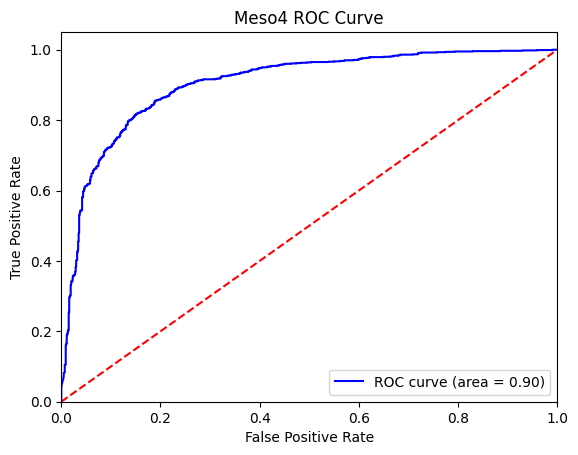

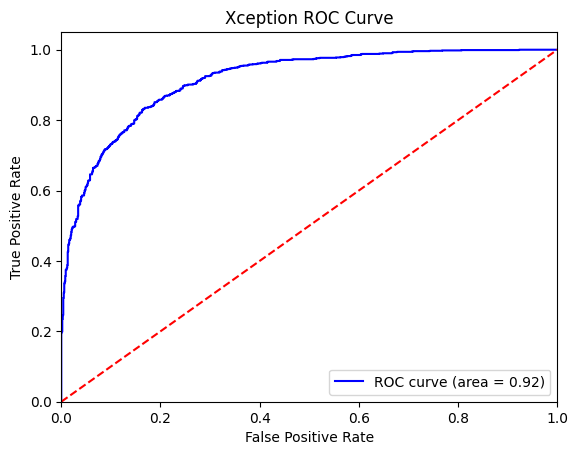

In [8]:
# Compute ROC AUC
roc_auc_meso = roc_auc_score(y_true, y_pred_meso, multi_class='ovr')
roc_auc_xcep = roc_auc_score(y_true, y_pred_xcep, multi_class='ovr')
print(f"Meso4 ROC AUC: {roc_auc_meso:.2f}")
print(f"Xception ROC AUC: {roc_auc_xcep:.2f}")

# Plot ROC curves
def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()
plot_roc_curve(y_true, y_pred_meso, "Meso4 ROC Curve")
plot_roc_curve(y_true, y_pred_xcep, "Xception ROC Curve")

Inference- From the AUC we can also conclude that the models are giving almost simmilar performance with Xception being slightly better.

# FLOPS

In [9]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

def get_flops_tf(model, input_shape):
    # Generate concrete function
    input_spec = tf.TensorSpec([1] + list(input_shape), tf.float32)
    concrete_func = tf.function(lambda x: model(x)).get_concrete_function(input_spec)

    # Convert to frozen graph
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    graph_def = frozen_func.graph.as_graph_def()

    # Calculate FLOPs using tf.compat.v1
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")
        run_meta = tf.compat.v1.RunMetadata()
        opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        flops = tf.compat.v1.profiler.profile(graph=graph,
                                              run_meta=run_meta,
                                              cmd='op',
                                              options=opts)
        return flops.total_float_ops



flops_meso = get_flops_tf(meso.model, [256, 256, 3])
flops_xcep = get_flops_tf(xcep.model, [256, 256, 3])


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


I0000 00:00:1751306908.911370  699396 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1751306908.911539  699396 single_machine.cc:374] Starting new session
I0000 00:00:1751306908.920282  699396 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2153 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6



=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
op: The nodes are operation kernel type, such as MatMul, Conv2D. Graph nodes belonging to the same type are aggregated together.
flops: Number of float operations. Note: Please read the implementation for th

I0000 00:00:1751306910.020604  699396 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1751306910.020825  699396 single_machine.cc:374] Starting new session
I0000 00:00:1751306910.028821  699396 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2153 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6



=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
op: The nodes are operation kernel type, such as MatMul, Conv2D. Graph nodes belonging to the same type are aggregated together.
flops: Number of float operations. Note: Please read the implementation for th

In [10]:
print(f"FLOPs (MesoNet): {flops_meso:,}")
print(f"FLOPs (Xception): {flops_xcep:,}")

FLOPs (MesoNet): 123,044,177
FLOPs (Xception): 11,943,906,049


Inference- Xception is **97 times** more computationally expensive than Mesonet and we since we have simmilar performance from both the models, we can draw an inference that using Mesonet is more benifitial for us with respect to FLOPS.

## No. of Parameters

In [11]:
params_meso = meso.model.count_params()
params_xcep = xcep.model.count_params()

print(f"MesoNet Params: {params_meso}")
print(f"Xception Params: {params_xcep}")


MesoNet Params: 28073
Xception Params: 20863529


Inference- Also the number of parameters in Xception are 3 order higher than that of Mesonet, which means Xception is really way heavier than Mesonet with simmilar performance.

## Perturbation
Here to check robustness we applied changes to image in the following way:
- Adding Noise
- Increase Contrast
- Blurring
- Increasing Saturation
- Convering to JPEG

In [ ]:
import os
import numpy as np
from PIL import ImageEnhance, ImageFilter, Image
from tqdm import tqdm

def apply_perturbation(img, kind):
    pil_img = array_to_img(img)
    
    if kind == 'contrast':
        enhancer = ImageEnhance.Contrast(pil_img)
        pil_img = enhancer.enhance(2.0)
    elif kind == 'saturation':
        enhancer = ImageEnhance.Color(pil_img)
        pil_img = enhancer.enhance(2.0)
    elif kind == 'blur':
        pil_img = pil_img.filter(ImageFilter.GaussianBlur(radius=3))
    elif kind == 'jpeg':
        pil_img.save("temp.jpg", "JPEG", quality=40)
        pil_img = Image.open("temp.jpg")
    elif kind == 'noise':
        arr = img_to_array(pil_img)
        noise = np.random.normal(0, 25, arr.shape).astype(np.uint8)
        arr = np.clip(arr + noise, 0, 255)
        pil_img = array_to_img(arr)

    return img_to_array(pil_img)


def load_images_from_directory(path, target_size=(256, 256)):
    images = []
    labels = []
    class_indices = test_loader_meso.class_indices
    index_to_class = {v: k for k, v in class_indices.items()}

    for class_idx, class_name in index_to_class.items():
        class_path = os.path.join(path, class_name)
        for fname in sorted(os.listdir(class_path)):
            img_path = os.path.join(class_path, fname)
            img = load_img(img_path, target_size=target_size)
            img = img_to_array(img)
            images.append(img)
            labels.append(class_idx)
    
    return np.array(images), np.array(labels)


X_test_raw, y_true = load_images_from_directory("test_faces")


perturbations = ['contrast', 'saturation', 'blur', 'jpeg', 'noise']

for p in perturbations:
    print(f"\nEvaluating with {p} perturbation...")

    meso_preds = []
    xcep_preds = []

    for i in tqdm(range(len(X_test_raw))):
        x = X_test_raw[i]
        perturbed = apply_perturbation(x, p)


        meso_input = perturbed[np.newaxis, ...] / 255.0
        xcep_input = preprocess_input(perturbed[np.newaxis, ...])


        meso_pred = meso.model.predict(meso_input,verbose=0)[0][0]
        xcep_pred = xcep.model.predict(xcep_input,verbose=0)[0][0]

        meso_preds.append(meso_pred)
        xcep_preds.append(xcep_pred)

    # AUC
    auc_meso_p = roc_auc_score(y_true, meso_preds)
    auc_xcep_p = roc_auc_score(y_true, xcep_preds)

    print(f"{p.capitalize()} Perturbation - AUC (Meso): {auc_meso_p:.4f}, AUC (Xception): {auc_xcep_p:.4f}")





Evaluating with contrast perturbation...


100%|██████████| 2000/2000 [09:10<00:00,  3.63it/s]


Contrast Perturbation - AUC (Meso): 0.6246, AUC (Xception): 0.7042

Evaluating with saturation perturbation...


100%|██████████| 2000/2000 [09:54<00:00,  3.36it/s]


Saturation Perturbation - AUC (Meso): 0.5216, AUC (Xception): 0.8213

Evaluating with blur perturbation...


100%|██████████| 2000/2000 [09:52<00:00,  3.38it/s]


Blur Perturbation - AUC (Meso): 0.5114, AUC (Xception): 0.7980

Evaluating with jpeg perturbation...


100%|██████████| 2000/2000 [10:02<00:00,  3.32it/s]


Jpeg Perturbation - AUC (Meso): 0.5220, AUC (Xception): 0.9060

Evaluating with noise perturbation...


100%|██████████| 2000/2000 [10:13<00:00,  3.26it/s]

Noise Perturbation - AUC (Meso): 0.4967, AUC (Xception): 0.5785


Inference- Now we can clearly see that Xception Models perform way better even if images were changed a bit, that is Xception model is way too robust which explains the reason why using xception can be better even if it is way too much computationally expensive.

## Inference Time

In [ ]:
import time
import numpy as np

def measure_inference_time(model, X, batch_size=32):
    total_time = 0.0
    num_images = len(X)

    for i in range(0, num_images, batch_size):
        batch = X[i:i+batch_size]
        start = time.time()
        
        if hasattr(model, 'model'):
            _ = model.model.predict(batch, verbose=0)
        else:
            _ = model.predict(batch, verbose=0)
        
        end = time.time()
        total_time += (end - start)

    return total_time / num_images

X_test_norm_meso = X_test_raw / 255.0
X_test_norm_xcep = preprocess_input(X_test_raw.copy())

time_meso = measure_inference_time(meso, X_test_norm_meso, batch_size=32)
time_xcep = measure_inference_time(xcep, X_test_norm_xcep, batch_size=8)

print(f"MesoNet inference time: {time_meso:.6f}s/image")
print(f"Xception inference time: {time_xcep:.6f}s/image")



MesoNet inference time: 0.006178s/image
Xception inference time: 0.023697s/image


Inference- Xception is almost 3.8 times slower than the Mesonet, pretty justified by its complexity.